<a href="https://www.kaggle.com/code/kamalapousajja/most-subscribed-youtube-channel-analysis?scriptVersionId=137693474" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Most subscribed youtube channel analysis**

Key finding topics in this analysis.

* Top 5 Total Number of Youtube Channel By Categories
* Top 5 Music Youtube Channels with The Most Video Count
* Top 5 Music Youtube Channels with The Most Video Views
* Top 5 Education Youtube Channels with The Most Video Views
* Trend in the Youtube Channels Created Each Year
* Correlation between variables

# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# **2. Read Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv")

df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


# **3. Data Cleaning**

In [3]:
#Check the data type

df.dtypes

Rank                int64
Youtube Channel    object
Subscribers        object
Video Views        object
Video Count        object
Category           object
Started             int64
dtype: object

> *Found the columns of Subscribers, Video Views and Video Count have string data types , So I change to integer data types.*

In [4]:
# Change the data type

df["Subscribers"] = df["Subscribers"].str.replace(",","").astype(int)
df["Video Views"] = df["Video Views"].str.replace(",","").astype(int)
df["Video Count"] = df["Video Count"].str.replace(",","").astype(int)

df.dtypes

Rank                int64
Youtube Channel    object
Subscribers         int64
Video Views         int64
Video Count         int64
Category           object
Started             int64
dtype: object

In [5]:
df.shape

(1000, 7)

In [6]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


In [7]:
#Delete "Rank" column that not related.

df = df.drop(["Rank"], axis = 1 )

df.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,234000000,212900271553,18515,Music,2006
1,YouTube Movies,161000000,0,0,Film & Animation,2015
2,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,SET India,150000000,137828094104,103200,Shows,2006
4,MrBeast,128000000,21549128785,733,Entertainment,2012


In [8]:
#Check missing values

df.isnull().sum()

Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [9]:
#Check for unique data of the "Category" column

df.Category.unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [10]:
#Check for unique data and count for the "Category" column 

df.groupby("Category")["Category"].count()

Category
Autos & Vehicles                                                                  1
Comedy                                                                           68
Education                                                                        45
Entertainment                                                                   238
Film & Animation                                                                 50
Gaming                                                                           94
Howto & Style                                                                    43
Movies                                                                            2
Music                                                                           217
News & Politics                                                                  27
Nonprofits & Activism                                                             2
People & Blogs                                                     

> Found 30 rows that are unknown category as an URL. 
> 
> Remove that unknown category.

In [11]:
#Remove URL that are unknown category

df = df[df["Category"] != "https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels"]

df.Category.unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [12]:
df.shape

(970, 6)

> 30 rows have been removed

In [13]:
#Getting to know the summary of statistical information

df.describe()

,Subscribers,Video Views,Video Count,Started
count,9.700000e+02,9.700000e+02,970.000000,970.000000
mean,2.143093e+07,1.011864e+10,9693.675258,2012.470103
std,1.629649e+07,1.313615e+10,32646.007496,4.084964
min,1.140000e+07,0.000000e+00,0.000000,1970.000000
25%,1.340000e+07,3.957143e+09,377.500000,2010.000000
50%,1.660000e+07,6.759344e+09,932.500000,2013.000000
75%,2.310000e+07,1.242537e+10,3377.750000,2015.000000
max,2.340000e+08,2.129003e+11,342802.000000,2021.000000


# **4. Data Visualization**

# Top 5 Total Number of Youtube Channels By Category

In [14]:
#Find the Total number of Youtube Channel by Category

categories = df["Category"].value_counts().sort_values(ascending = False).reset_index()

categories

,index,Category
0,Entertainment,238
1,Music,217
2,People & Blogs,132
3,Gaming,94
4,Comedy,68
5,Film & Animation,50
6,Education,45
7,Howto & Style,43
8,News & Politics,27
9,Science & Technology,18


Text(0, 0.5, 'Categories')

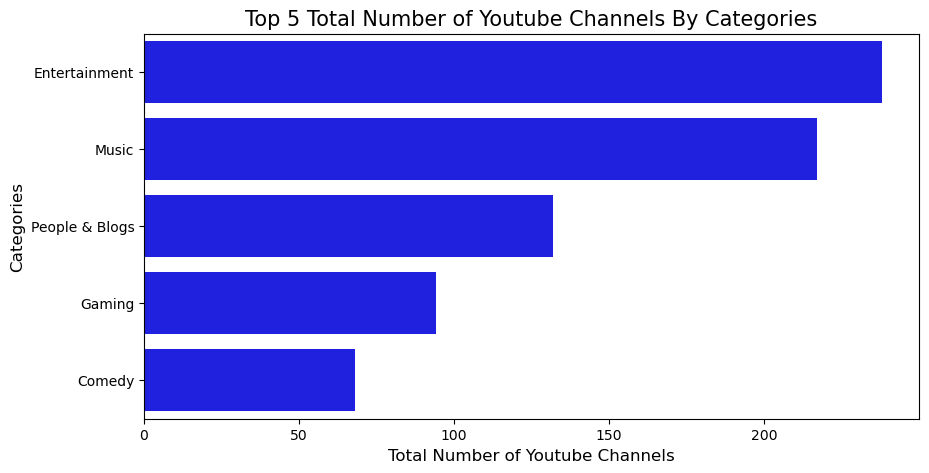

In [15]:
#Visualisation

plt.figure(figsize=(10, 5))
             
sns.barplot(
    data = categories,
    x = categories["Category"],
    y = categories["index"][:5],
    color = "blue"
    )

plt.title("Top 5 Total Number of Youtube Channels By Categories",fontsize = 15)
plt.xlabel("Total Number of Youtube Channels",fontsize = 12)
plt.ylabel("Categories",fontsize = 12)


In [16]:
#Pie chart

fig = px.pie(values = categories["Category"],
             names = categories["index"])

fig.update_layout(title = "Percentage of Youtube Channel By Category", 
                  font_size = 15, title_x = 0.5)
fig.update_traces(textposition = "inside",
                  textfont_size = 11,
                  textinfo = "percent+label")
fig.show()

In [17]:
#Select only Top 5 for the donut chart

fig = px.pie(values = categories["Category"][:5],
             names = categories["index"][:5],
             hole = .7)

fig.update_layout(title = "Top 5 Total Number of Youtube Channel By Category", 
                  font_size = 15, title_x = 0.5)
fig.update_traces(textposition = "outside",
                  textfont_size = 13,
                  textinfo = "label + value")
fig.show()

> *Entertainment, Music, People & Blogs, Gaming, Comedy are top 5 of category proportion*

# Video views and Subscribers By Categories

In [18]:
fig = px.scatter(df, 
                 x = "Subscribers", 
                 y = "Video Views",
                 size = "Video Views", 
                 color = "Category",
                 log_x = True, 
                 size_max = 50,
                 title = "Video views and Subscribers By Categories",
                 marginal_y ='rug')
fig.show()

> *Musics, Education and Shows ranked top 3 higest of Video Views and Subscribers.*

# Top 5 Music Youtube Channels with The Most Video Count

In [19]:
#Create a new data frame of "Music" category

df_music = df[df.Category == "Music"]

df_music.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,234000000,212900271553,18515,Music,2006
12,Zee Music Company,91600000,53352597784,7530,Music,2014
18,BANGTANTV,73100000,19240057894,2090,Music,2012
19,Justin Bieber,70800000,29598652357,249,Music,2007
20,HYBE LABELS,69600000,25947702825,1070,Music,2008


In [20]:
#Find top 5 of the most video count

new_index = df_music["Video Count"].sort_values(ascending = False).index.values
sorted_df_music = df_music.reindex(new_index)
sorted_df_music_5 = sorted_df_music[:5]
sorted_df_music_5

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
251,Indosiar,23100000,11795485473,64565,Music,2013
29,T-Series Bhakti Sagar,57300000,27004807684,24900,Music,2011
210,WatchMojo.com,24900000,16036594903,23571,Music,2007
274,Wave Music Bhojpuri,22300000,12530155484,21963,Music,2014
238,netd müzik,23500000,53386751228,21930,Music,2014


Text(0.5, 1.0, 'Top 5 Music Youtube Channels with The Most Video Count')

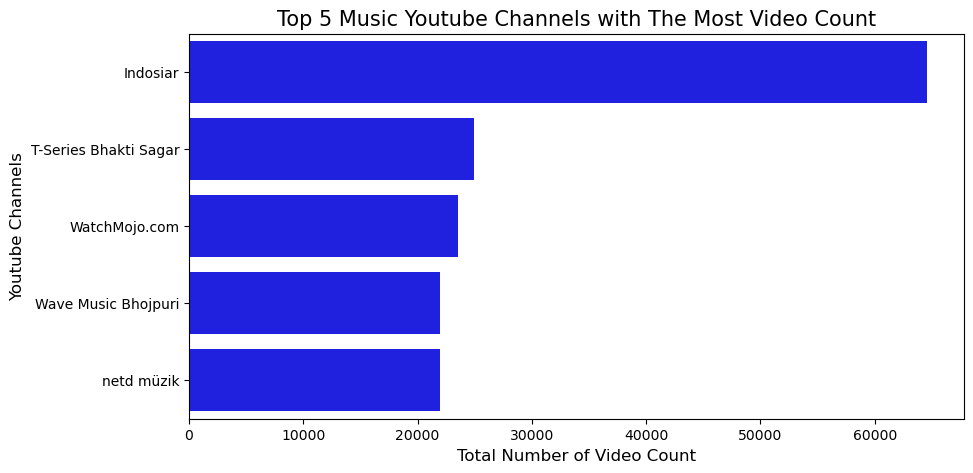

In [21]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(sorted_df_music_5, 
            x = "Video Count", 
            y = "Youtube Channel", 
            color = "blue")

plt.xlabel("Total Number of Video Count", fontsize = 12)
plt.ylabel("Youtube Channels", fontsize = 12)
plt.title("Top 5 Music Youtube Channels with The Most Video Count", fontsize = 15)

> *Indosiar has the most video count of Music category*

# Top 5 Music Youtube Channels with The Most Video Views

In [22]:
#Find top 5 of the most video views

new_index2 = df_music["Video Views"].sort_values(ascending = False).index.values
sorted_df_music_views = df_music.reindex(new_index2)
sorted_df_music_views_5 = sorted_df_music_views[:5]
sorted_df_music_views_5

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,234000000,212900271553,18515,Music,2006
36,El Reino Infantil,55000000,53458257145,1410,Music,2011
238,netd müzik,23500000,53386751228,21930,Music,2014
12,Zee Music Company,91600000,53352597784,7530,Music,2014
32,Wave Music,55700000,38819471815,18970,Music,2014


Text(0.5, 1.0, 'Top 5 Music Youtube Channels with The Most Video Views')

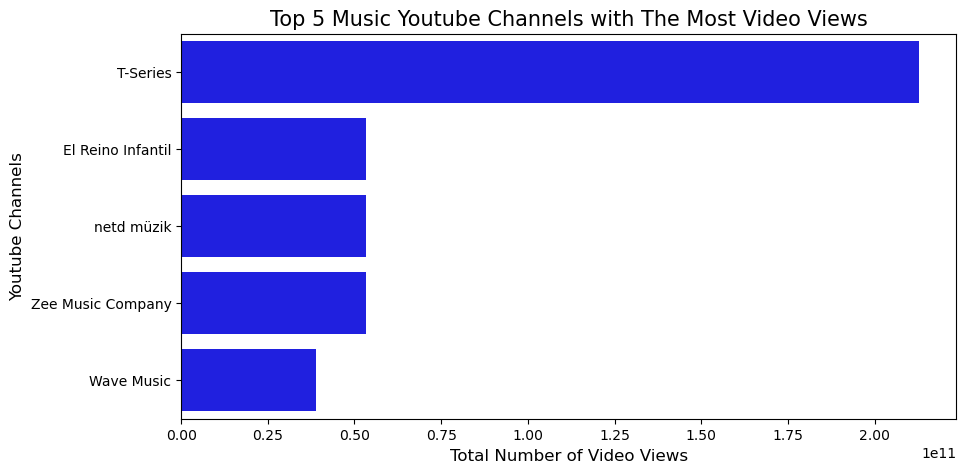

In [23]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(sorted_df_music_views_5, 
            x = "Video Views", 
            y = "Youtube Channel", 
            color = "blue")

plt.xlabel("Total Number of Video Views", fontsize = 12)
plt.ylabel("Youtube Channels", fontsize = 12)
plt.title("Top 5 Music Youtube Channels with The Most Video Views", fontsize = 15)

> T-Series has the most video views of Music category

# Top 5 Education Youtube Channels with The Most Video Views

In [24]:
#Create a new data frame of "Education" category

df_edu = df[df.Category == "Education"]

df_edu.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
2,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
23,Pinkfong Baby Shark - Kids' Songs & Stories,64600000,35934421688,2599,Education,2011
25,ChuChu TV Nursery Rhymes & Kids Songs,61100000,41904239949,531,Education,2013
42,BillionSurpriseToys - English Kids Songs & Car...,49700000,8662901485,637,Education,2013
43,Infobells - Hindi,48400000,27621598218,514,Education,2014


In [25]:
#Find top 5 of the most video views

new_index3 = df_edu["Video Views"].sort_values(ascending = False).index.values
sorted_df_edu = df_edu.reindex(new_index3)
sorted_df_edu_5 = sorted_df_edu[:5]
sorted_df_edu_5

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
2,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
25,ChuChu TV Nursery Rhymes & Kids Songs,61100000,41904239949,531,Education,2013
84,Super Simple Songs - Kids Songs,37400000,40905820903,647,Education,2006
66,Little Baby Bum - Nursery Rhymes & Kids Songs,40600000,38573516896,2245,Education,2011
23,Pinkfong Baby Shark - Kids' Songs & Stories,64600000,35934421688,2599,Education,2011


Text(0.5, 1.0, 'Top 5 Education Youtube Channels with The Most Video Views')

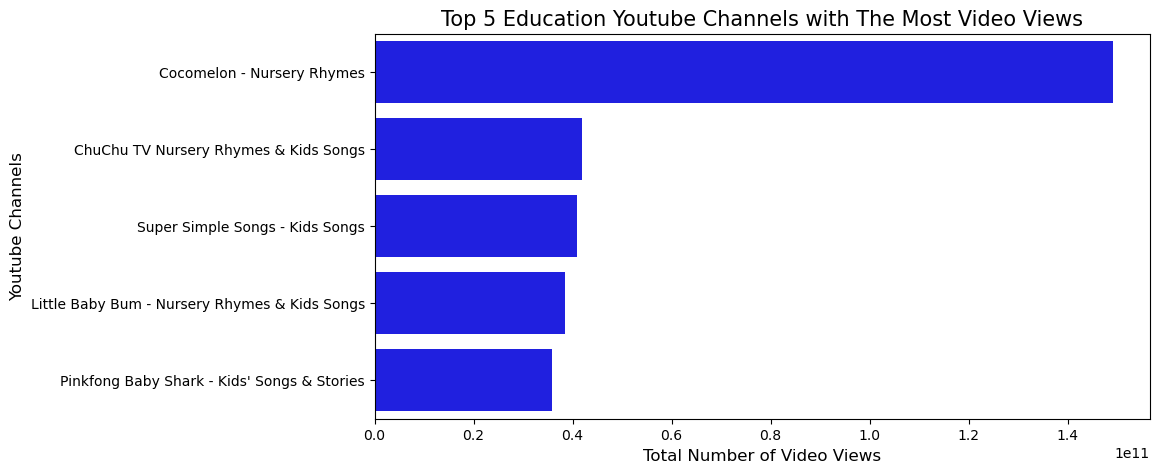

In [26]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot(sorted_df_edu_5, 
            x = "Video Views", 
            y = "Youtube Channel", 
            color = "blue")

plt.xlabel("Total Number of Video Views", fontsize = 12)
plt.ylabel("Youtube Channels", fontsize = 12)
plt.title("Top 5 Education Youtube Channels with The Most Video Views", fontsize = 15)

> *Cocomelon has the most video view of Education category*

# Trend in the Youtube Channels Created Each Year

In [27]:
#Find the total number of Youtube Channels created each year
#Youtube was launched on 2005. So I removed the year of 1970 that would be incorrect data.

year = df[df.Started != 1970]
year2 =  year["Started"].value_counts()
year2

2014    120
2015     94
2011     87
2013     81
2012     79
2016     75
2006     69
2017     62
2009     59
2008     45
2007     45
2010     45
2018     41
2005     21
2019     20
2020     15
2021     11
Name: Started, dtype: int64

Text(0.5, 1.0, 'Trend in the Youtube Channels Created Each Year')

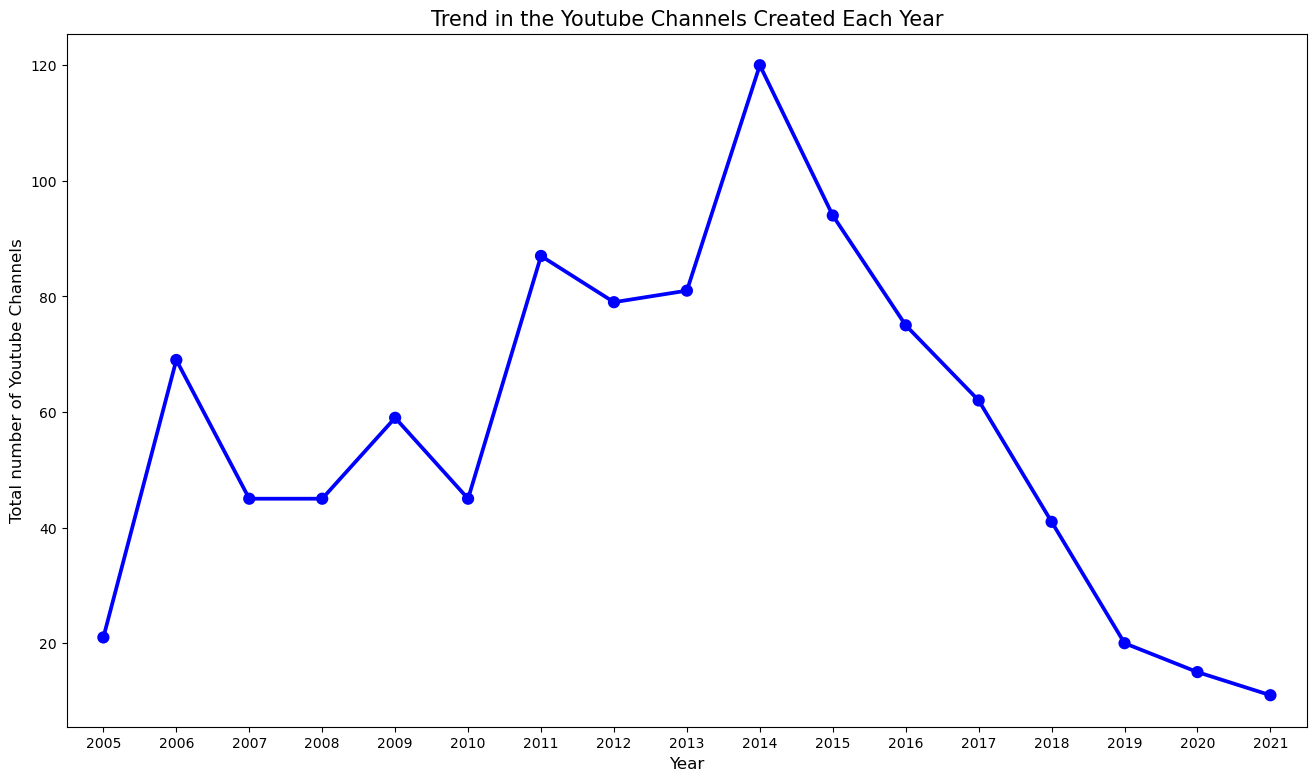

In [28]:
#Visualisation

plt.figure(figsize=(16,9))

sns.pointplot(x = year2.index,
              y = year2.values, 
              color = "blue")

plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total number of Youtube Channels", fontsize = 12)
plt.title("Trend in the Youtube Channels Created Each Year",size = 15)


> *The maximum number of the Youtube Channels was in 2014 and then kept decreasing since then*

# **Correlation between variables**

<AxesSubplot:xlabel='Subscribers', ylabel='Video Views'>

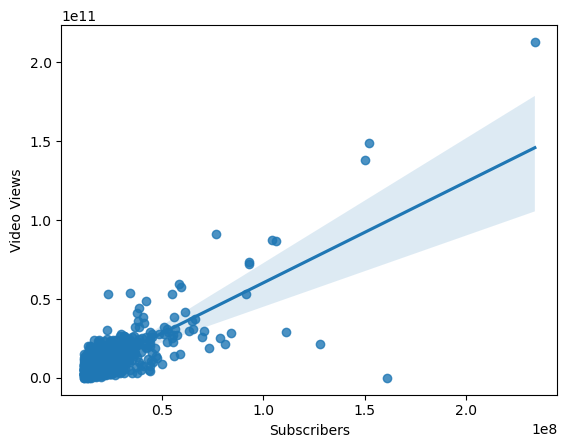

In [29]:
sns.regplot(data = df, 
            x = "Subscribers", 
            y = "Video Views")

<AxesSubplot:xlabel='Subscribers', ylabel='Video Count'>

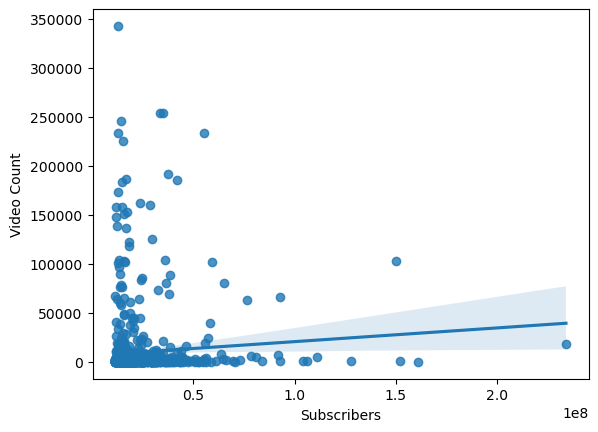

In [30]:
sns.regplot(data = df, 
            x = "Subscribers", 
            y = "Video Count")

<AxesSubplot:xlabel='Video Views', ylabel='Video Count'>

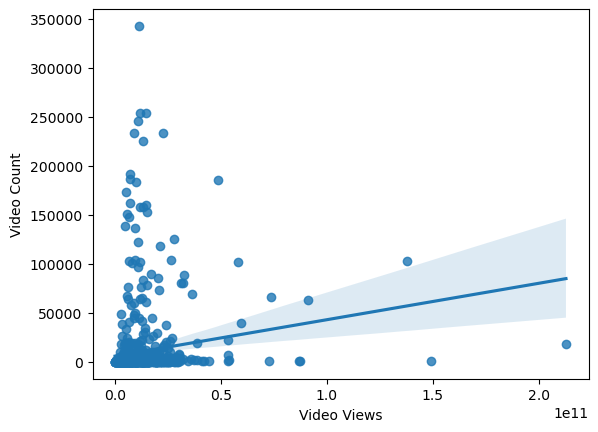

In [31]:
sns.regplot(data = df, 
            x = "Video Views", 
            y = "Video Count")

# **The heat map explains the correlation**

<AxesSubplot:>

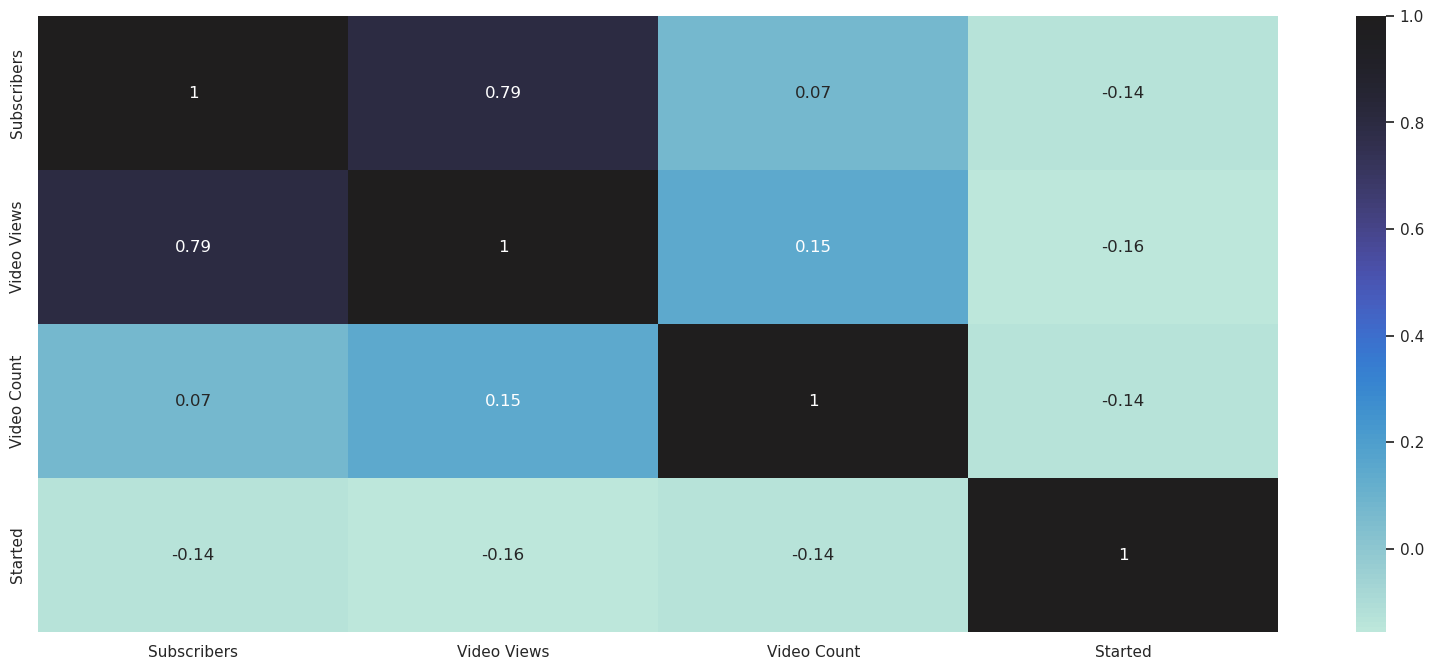

In [32]:
plt.figure(figsize=(20,8))
sns.set_theme("notebook")
sns.heatmap(df.corr(), annot = True, center = True)

> *It seems Number of Subscribers has strong correlationship with Video Views, but not significant correlationship with Video Counts. In other words, a channel with lots of videos count may not have lots of Subscribers. Moreover there is weak correlationship between Video Views and Video Count.*